<h1>Aprendizaje Supervizado</h1>

**Underfitting, Generalization, Overfitting**

<img src = 'img1.png'>


In [185]:
#Instalar librería mgleran, solo para fines de enseñanza
!pip install mglearn
#Problema de importación con mglearn en Colab

In [186]:
#Importar librerías
import mglearn
import matplotlib.pyplot as plt
import numpy as np

In [187]:
# Importar warnings filter
from warnings import simplefilter
# Ignore todos los futuros warnings
simplefilter(action='ignore', category=FutureWarning)

<h1>Datasets</h1>

X.shape: (26, 2)


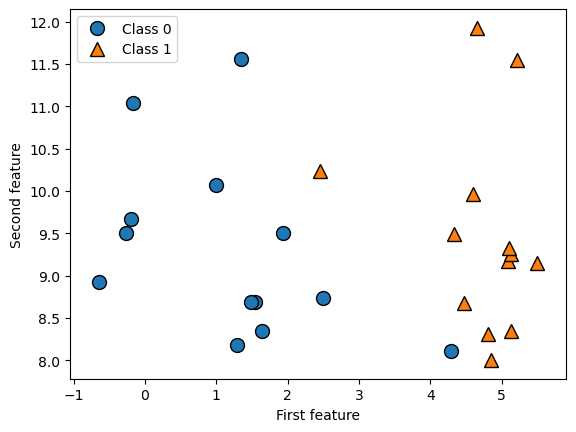

In [188]:
#dataset con dos variables de características diferentes
#Usado para clasificación
X, y = mglearn.datasets.make_forge()
from sklearn.datasets import make_blobs
# plot dataset
mglearn.discrete_scatter(X[:, 1], X[:, 0],y)
plt.legend(["Class 0", "Class 1"], loc=2)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

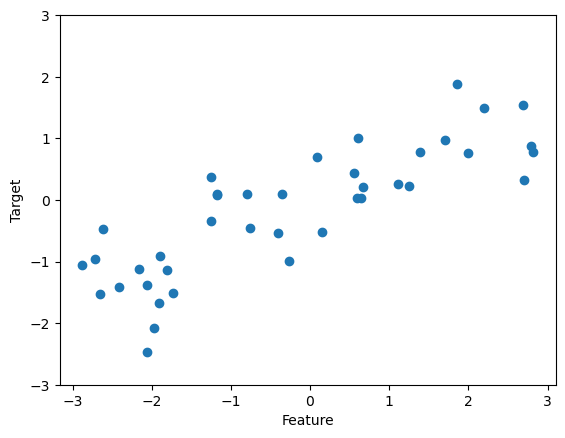

In [189]:
#Este dataset solo contiene una variable "feature" y una "target"
#Usado para regresión
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

<h1>1. k-Nearest Neighbors</h1>

Es posiblemente el algoritmo más sencillo de ML. Solo se necesitan los datos de entrenamiento. Para hacer la predicción de un nuevo punto, el algoritmo busca los puntos más cercanos a este en el conjunto de datos de entrenamiento.

**k-NN Clasificación**

En la forma más simple de k-NN, el algoritmo busca el vecino más cercano y de acuerdo a cómo este se encuentre clasificado, realiza la clasificación. La predicción puede mejorar si se aumenta el número de vecinos.

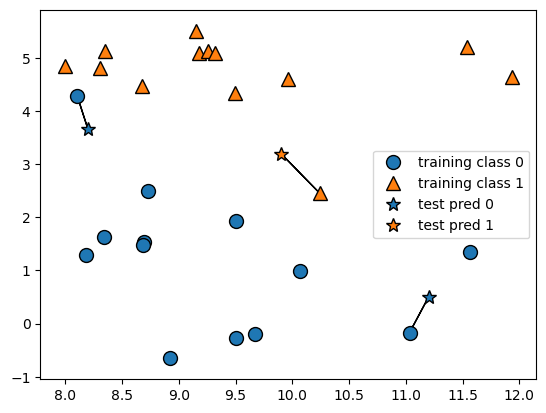

In [190]:
# 1 vecino
mglearn.plots.plot_knn_classification(n_neighbors=1)


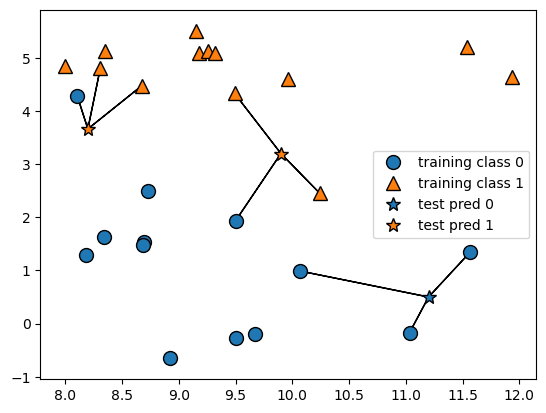

In [191]:
#Si se asignan más vecinos, por ejemplo 3, la predicción se realiza por votación.
#El algoritmo predice la clase que encuentre más frecuente entre vecinos.
mglearn.plots.plot_knn_classification(n_neighbors=3)


En este caso el modelo se usa para clasificación binaria, solo dos características, sin embargo, también
se puede usar con más características, funciona de la misma manera, prediciendo la clase más común.

Usemos scikit-learn:

In [265]:
#Creamos el conjunto de entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [266]:
#Creamos el clasificador
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9)

In [269]:
#Ajustamos
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [270]:
#Predicciones
print("Predicciones con el conjunto de test:", clf.predict(X_test))


Predicciones con el conjunto de test: [1 0 1 0 1 0 0]


In [271]:
#Precisión del modelo para los datos de testeo
print("Precisión con el conjunto de testeo: {:.2f}".format(clf.score(X_test, y_test)))


Precisión con el conjunto de testeo: 0.86


Predice correctamente el 86% de los datos.

**Frontera de decisión**
Es la línea o superficie que separa las diferentes clases en el espacion de características, es el límite que define la región de cada clase.

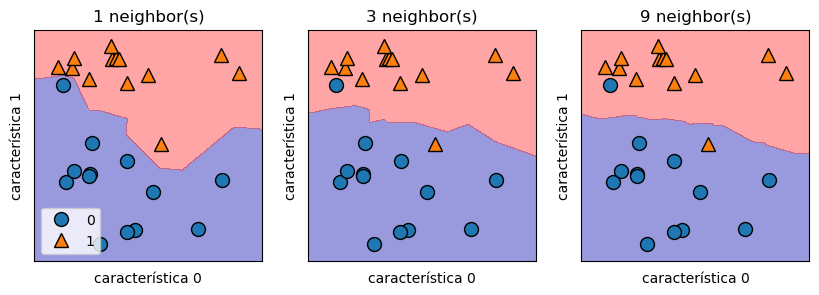

In [197]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("característica 0")
    ax.set_ylabel("característica 1")    
axes[0].legend(loc=3)

Con muchos vecinos, tantos como el número de características, el modelo escogería siempre la clase más frecuente.

**k-NN Regresión**

El valor de la predicción, se realiza de acuerdo a la frecuencia de los vecinos más cercanos, similar a como clasifica las características de acuerdo a los más frecuentes.

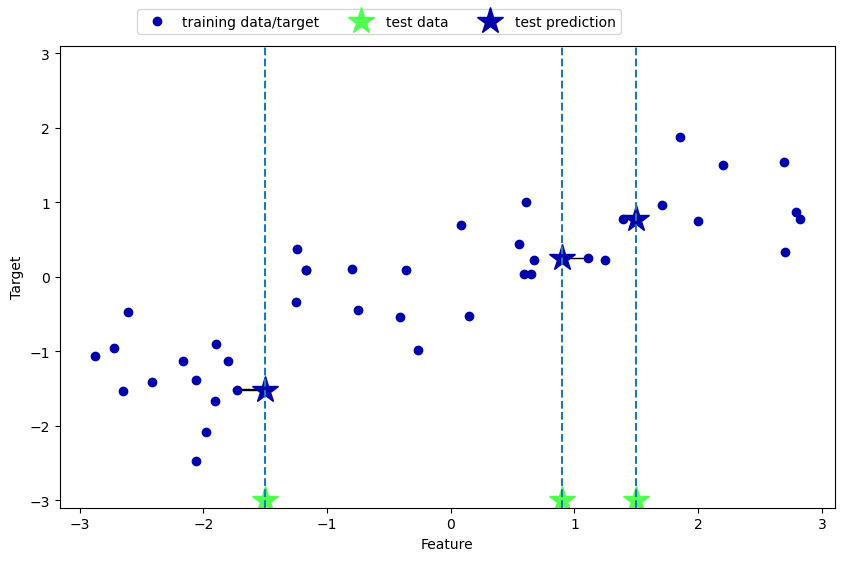

In [198]:
#Con 1 vecino
mglearn.plots.plot_knn_regression(n_neighbors=1)

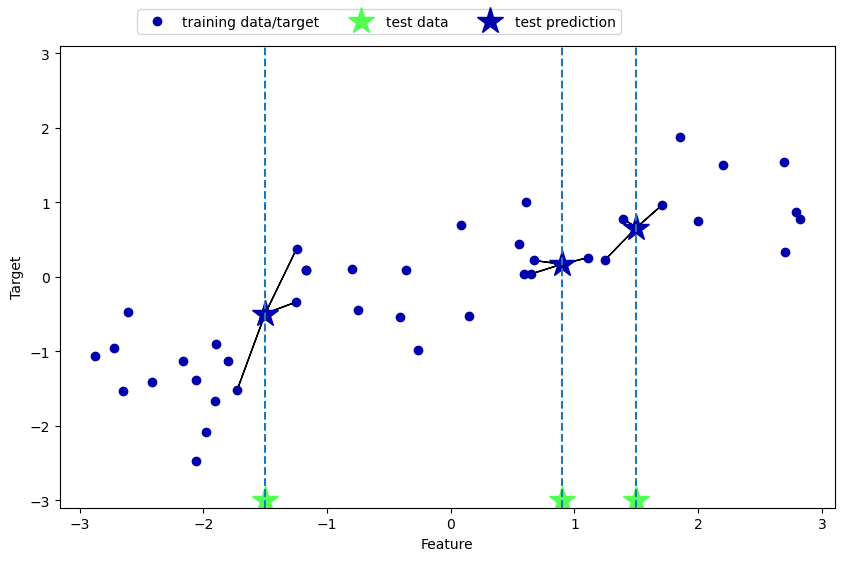

In [199]:
# Con 3 vecinos
#El valor de la predicción es el valor medio de los vecinos más relevantes
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [276]:
#Creamos el conjunto de entrenamiento y elregresor
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [277]:
#Predicciones
print("Predicciones con el conjunto de testeo:\n", reg.predict(X_test))

Predicciones con el conjunto de testeo:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [278]:
#Evaluar el modelo usando R^2, el coeficiente de determinación
print("R^2: {:.2f}".format(reg.score(X_test, y_test)))
print("R^2: {:.2f}".format(reg.score(X_train, y_train)))

R^2: 0.83
R^2: 0.82


Predice de manera correcta el 83% de los datos.

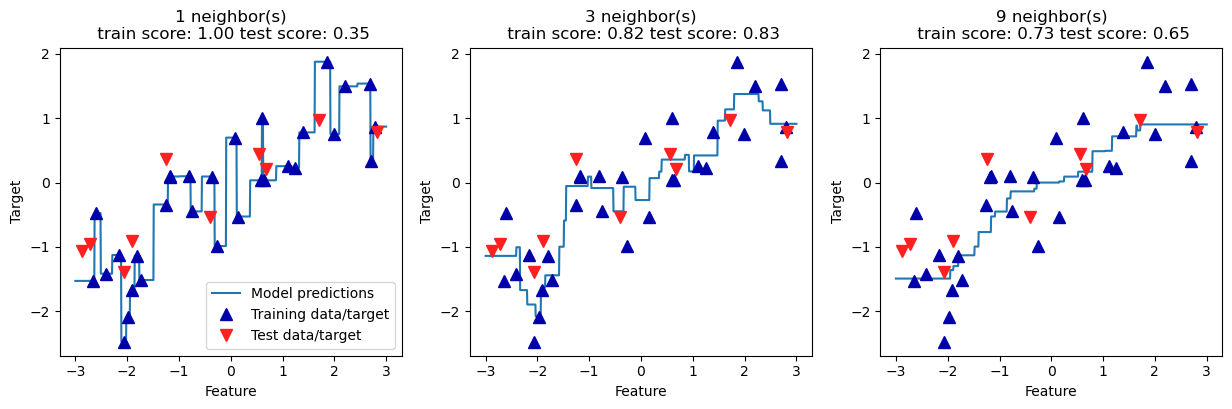

In [203]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

Generalmente se usan de 3 a 5 vecinos. No funciona muy bien en conjuntos de datos con cientos de características y muy malo con conjuntos de datos donde los valores más frecuentes son ceros.

<h1>2. Modelos lineales</h1>
Hacen una predicción usando una función lineal de las características de entrada.

**Modelos Lineales de Regresión**

La fórmula general para un modelo lineal es:

$\hat{y} = w[0]*x[0] + w[1]*x[1] + ... w[n]*x[n]+b$

donde $x[i]$ son las características, $w[i]$ son los coeficientes de regresión, $b$ el intercepto y $\hat{y}$ la predicción.

El caso más sencillo es la regresión lineal simple:

$\hat{y} = w[0]*x[0]+b$


w[0]: 0.393906  b: -0.031804


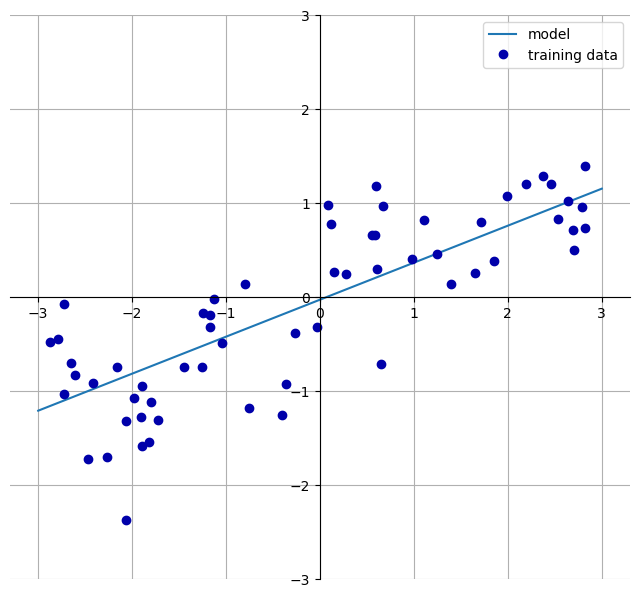

In [204]:
#Ejemplo de regresión lineal simple
mglearn.plots.plot_linear_regression_wave()

Si se tiene una sola caraterística la predicción es una línea, con dos es un plano y con más de dos es un hiperplano.
En particular, si se tienen más características que datos de entrenamiento, los modelos lineales modelan perfectamente una variable de predicción.

**Mínimos Cuadrados**

In [205]:
#Crea el conjunto de entrenamiento y el regresor
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)


In [206]:
#Coeficientes de la regresión
print("lr.coef_:", lr.coef_) #Este coeficiente es un arreglo de Numpy
print("lr.intercept_:", lr.intercept_) #Intercepto


lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


In [207]:
#Coeficiente de determinación
print("R^2 train: {:.2f}".format(lr.score(X_train, y_train)))
print("R^2 test: {:.2f}".format(lr.score(X_test, y_test)))


R^2 train: 0.67
R^2 test: 0.66


Valores cercanos de $R^{2}$ en los conjuntos train y test indican underfitting. Esto se puede mejorar con los modelos Ridge y Lasso, que funcionan con conjuntos de datos con muchas características.

**Modelos Lineales de Clasificación**

Los modelos lineales de clasificación separan las clases usando líneas, planos o hiperplanos, dependiendo del número de características que tenga. Los dos modelos de clasificación lineal más comunes son la Regresión Logística (Logistic Regression) y las máquinas vectoriales de soporte lineal (linear Support Vector Machines). La diferencia entre estos modelos es en la forma como calculan los coeficientes de regresión y el intercepto. La regresión logística es un modelo de clasificación no de predicción.

/Users/andres/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


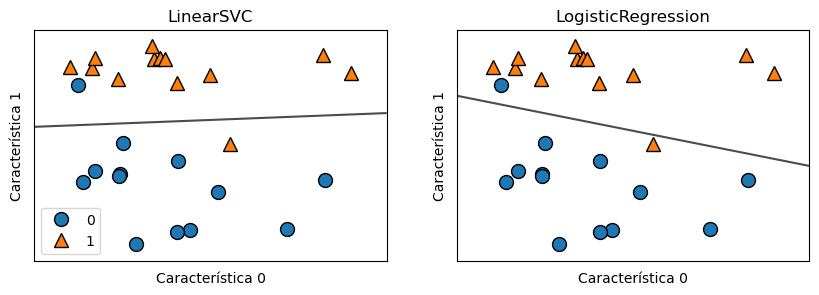

In [208]:
#Cargamos los dos modelos
#Graficamos las fronteras de decisión de los dos modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Característica 0")
    ax.set_ylabel("Característica 1")
axes[0].legend()

La línea separa las clases en dos conjuntos: clase 1 arriba y clase 0 abajo. Esto significa que los puntos por encima de la línea los clasifica como clase y por debajo de esta como clase 0.

In [209]:
#Creamos un conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [210]:
#Entrenamos y evaluamos el modelo
logreg = LogisticRegression().fit(X_train, y_train)
print("R^2 train: {:.3f}".format(logreg.score(X_train, y_train))) 
print("R^2 test: {:.3f}".format(logreg.score(X_test, y_test)))

R^2 train: 0.947
R^2 test: 0.857


**Regularización C**

Un valor bajo de C indica una fuerte regularización, en este caso el modelo se ajustará menos a los datos de entrenamiento y tendra una mayor capacidad de generalización, mientras que un valor alto de C indica una menor regularización, el modelo se ajustará más a los datos de entrenamiento y tendrá una menor capacidad de predicción.

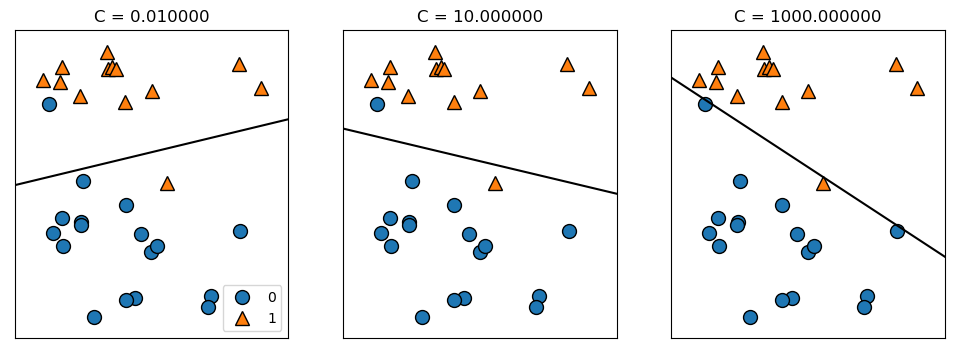

In [211]:
mglearn.plots.plot_linear_svc_regularization()

In [212]:
#logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

In [213]:
#print("R^2 train: {:.3f}".format(logreg001.score(X_train, y_train))) 
#print("R^2 test: {:.3f}".format(logreg001.score(X_test, y_test)))

In [214]:
#logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

In [215]:
#print("R^2 train: {:.3f}".format(logreg100.score(X_train, y_train))) 
#print("R^2 test: {:.3f}".format(logreg100.score(X_test, y_test)))

**Modelos lineales para clasificación multiclase**

Se usa la técnica *on vs rest*, que consiste en que el algoritmo separa cada una de las clases de las otros, resultando en una clasificación binaria por cada una de las clases. Esta tecníca la usa SVC.

In [216]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

In [217]:
linear_svm = LinearSVC().fit(X, y)

Text(0, 0.5, 'Feature 1')

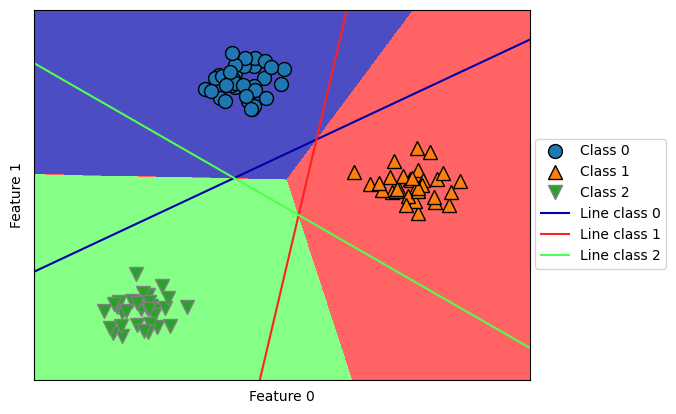

In [218]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<h1>3. Regresión Polinomial</h1>

Se usa para ajustar modelos no lineales.

In [219]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


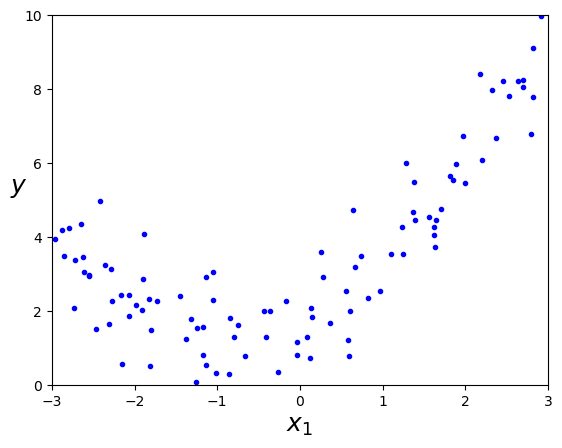

In [220]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [221]:
#include_bias=False indica que no incluya términos de sesgo adicional
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [222]:
#Creamos el regresor, entrenamos y calculamos el intercepto y los coeficientes de regresión
#X_poly agrega las características originales de X más el cuadrado de estas,
#de esta forma, se puede una regresión lineal con las características polinomicas
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

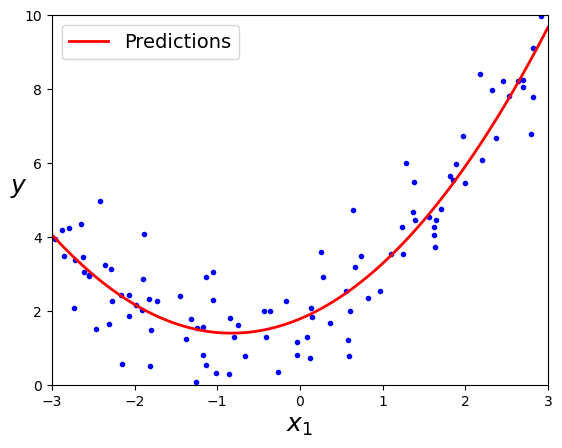

In [223]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

<h1>4. Arboles de decisión</h1>

Se usan para clasificación y regresión. Esencialmente, aprenden una jerarquía de preguntas if/else, que conducen a una decisión.


<img src = 'img2.png'>

In [224]:
#!pip install graphviz
#!pip install pydot

#conda install -c anaconda python-graphviz

#from sklearn.tree import export_graphviz
#import graphviz
#tree = mglearn.plots.plot_tree_not_monotone()
#display(tree)

In [225]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width 
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2) 
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [226]:
from sklearn.tree import export_graphviz
export_graphviz( 
    tree_clf,
    out_file="iris_tree.dot", 
    feature_names=iris.feature_names[2:], 
    class_names=iris.target_names, 
    rounded=True,
    filled=True,
        )

In [227]:
#dot -Tpng iris_tree.dot -o iris_tree.png

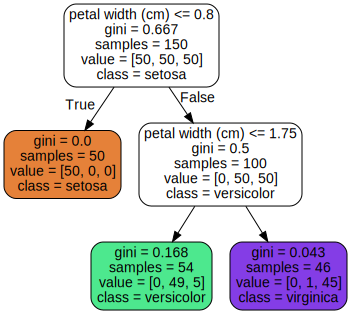

In [228]:
from graphviz import Source

with open("iris_tree.dot") as f:
    dot_graph = f.read()
Source(dot_graph)    

In [279]:
#Clasificador DTR